## Preparing accounts graphs

load the libraries & excel file

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

company_data = pd.read_excel('../my_files/features.xlsx')

function to make company name the column headers, then fill down with the values for for each account header annually

In [2]:
def transpose_append_annual(df,headers,full_df):
    this_year= df[headers]
    this_year = this_year.set_index('name')
    this_year = this_year.T
    full_df = pd.concat([full_df,this_year])
    return full_df

retrieve the columns that an account title in the name - so account figures can be gathered

In [3]:
#print(company_data.columns)
all_accounts = pd.DataFrame()
for i in range(5):
    title = 'y'+str(i)+'_title'
    annual_headers = ['name']
    for col in company_data.columns:
        if col[:8] == title or col[:9]==title:
            annual_headers.append(col)
    #all account header cols found for one year
    all_accounts = transpose_append_annual(company_data,annual_headers,all_accounts)
print(all_accounts.info())

<class 'pandas.core.frame.DataFrame'>
Index: 142 entries, y0_title_ACCRUALS AND DEFERRED INCOME to y4_title_TOTAL SHAREHOLDER FUNDS                  
Columns: 495 entries, Axial3D to United Optical Laboratories
dtypes: object(495)
memory usage: 550.2+ KB
None


data transposed - create a DF for each company

In [7]:
def create_ind_acc_df(company_series,company_name):
    this_comp_accs_df = pd.DataFrame(this_comp_accs)
    this_comp_accs_df.columns = ['acc_values']
    this_comp_accs_df['year_title'] = this_comp_accs_df.index.str.split('_')
    this_comp_accs_df['year'] = this_comp_accs_df['year_title'].str.get(0)
    this_comp_accs_df['year'] = this_comp_accs_df['year'].str[1:]
    this_comp_accs_df['title'] = this_comp_accs_df['year_title'].str.get(2)
    this_comp_accs_df=this_comp_accs_df.drop(columns=['year_title'])
    this_comp_accs_df.reset_index(drop=True, inplace=True) 
    return this_comp_accs_df

a short function to output some financial changes over time for one company

In [33]:
def bal_sheet_plot(this_comp_annuals_df,company_name):
    print("\n $£$ YEP THIS IS THE GRAPH £$£\n")
    #print(this_comp_annuals_df)
    years = this_comp_annuals_df.columns.values
    #this_comp_annuals_no_nulls_df=this_comp_annuals_df.dropna(how='any')
    this_data = []
    headings = this_comp_annuals_df.index.values
    for heading in headings:
        annual_vals = this_comp_annuals_df.loc[this_comp_annuals_df.index==heading].values[0]
        this_data.append(annual_vals)


    #resize the graph
    plt.figure(figsize=(5,3),dpi=300)
    for i in range(len(this_data)):
        plt.plot(years,this_data[i])

    plt.title(company_name)
    plt.xlabel("Year")
    plt.ylabel("£")

    plt.legend(headings,loc=9, bbox_to_anchor=(1.6, 1.0))
    plt.show()

Take each company and create a small dataframe showing the changes in their accounts over the years

----------- ---------- -------------

Axial3D

 $£$ YEP THIS IS THE GRAPH £$£



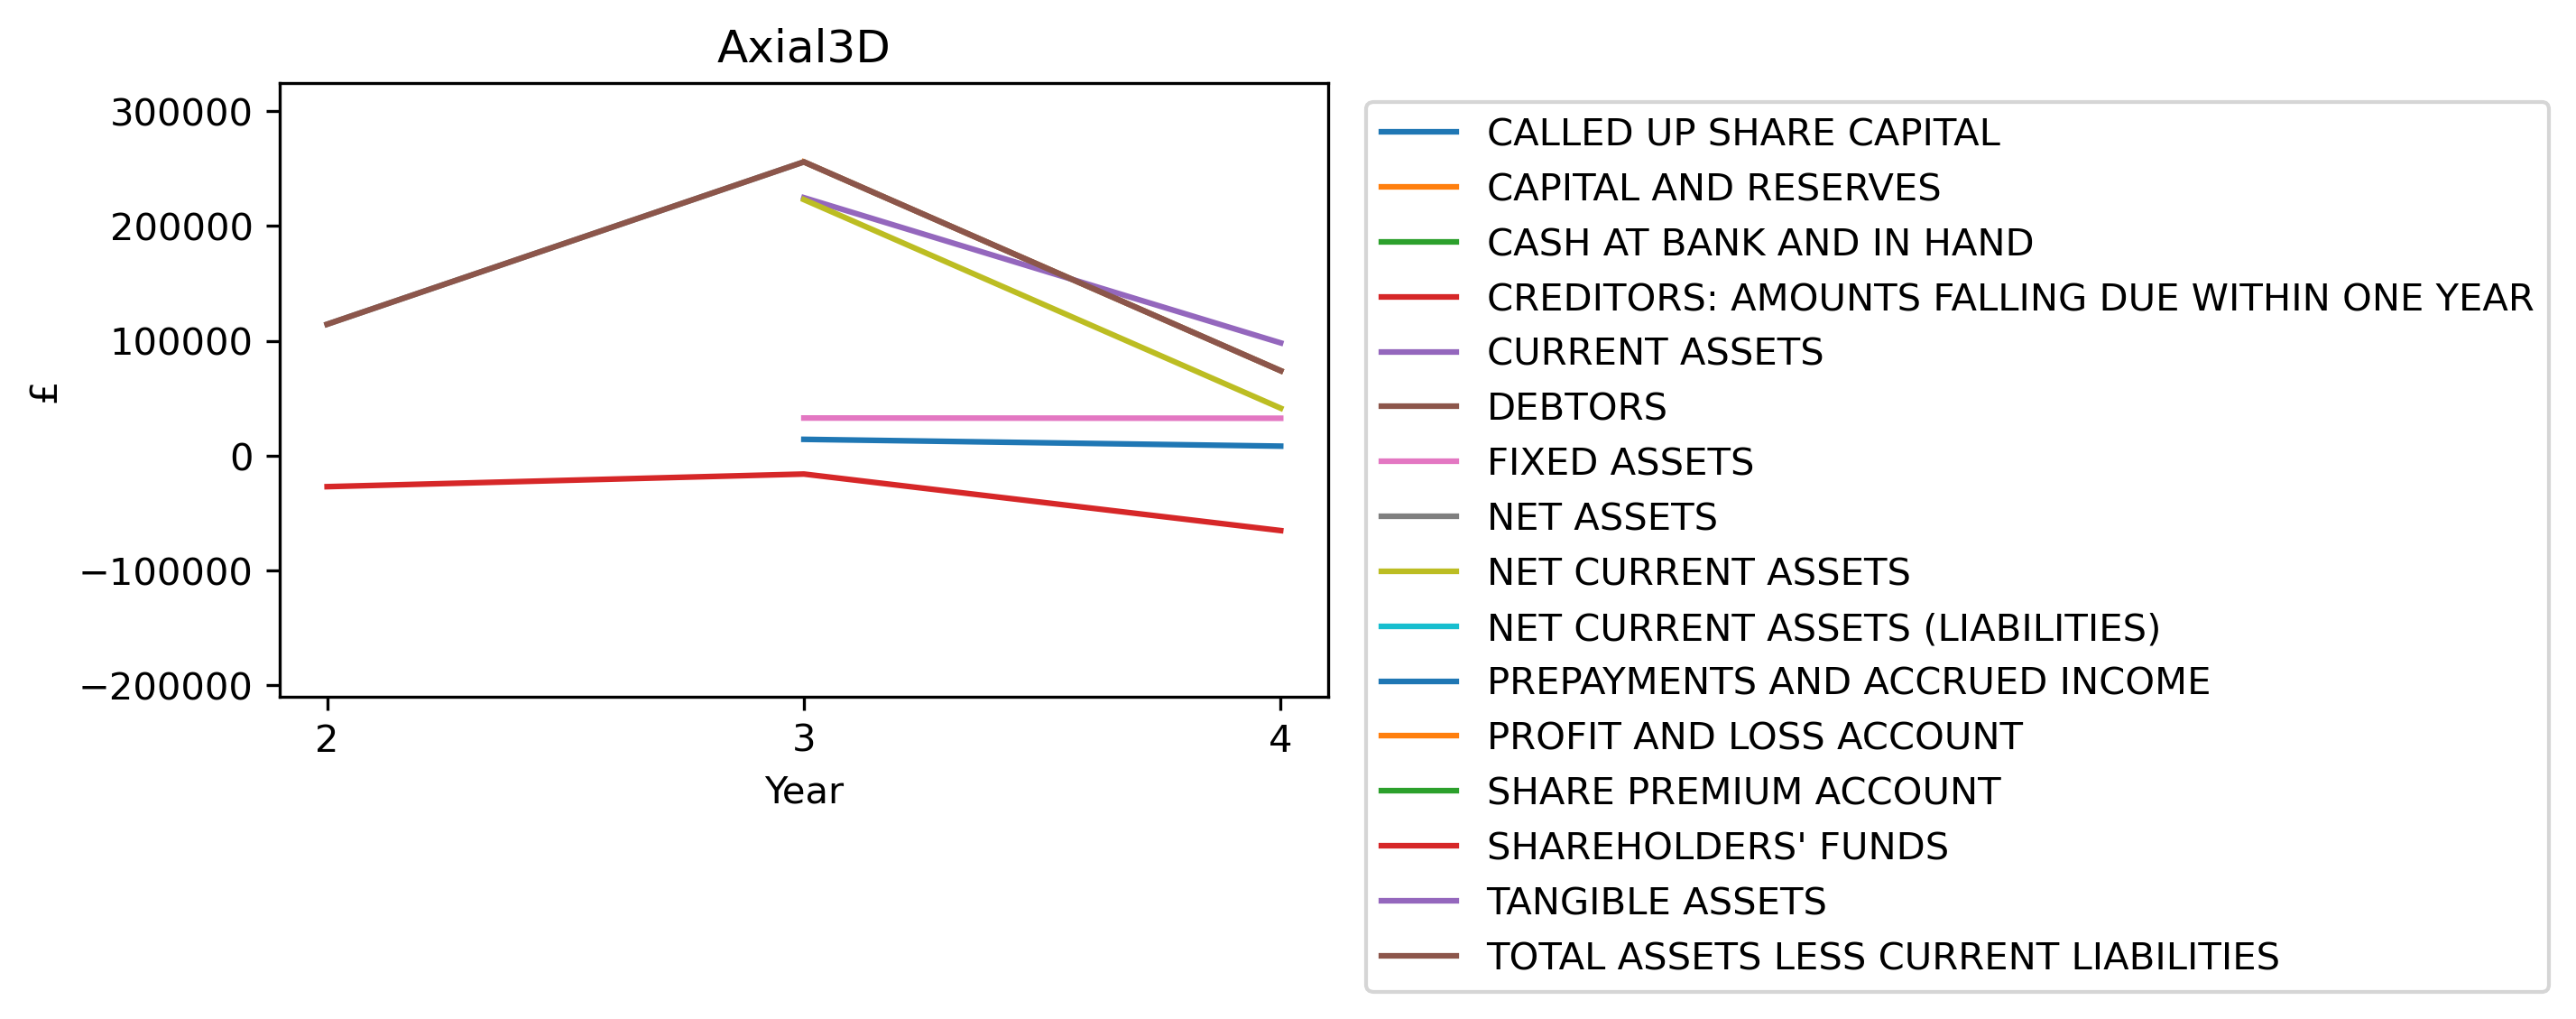

----------- ---------- -------------

Re-Vana Therapeutics

 $£$ YEP THIS IS THE GRAPH £$£



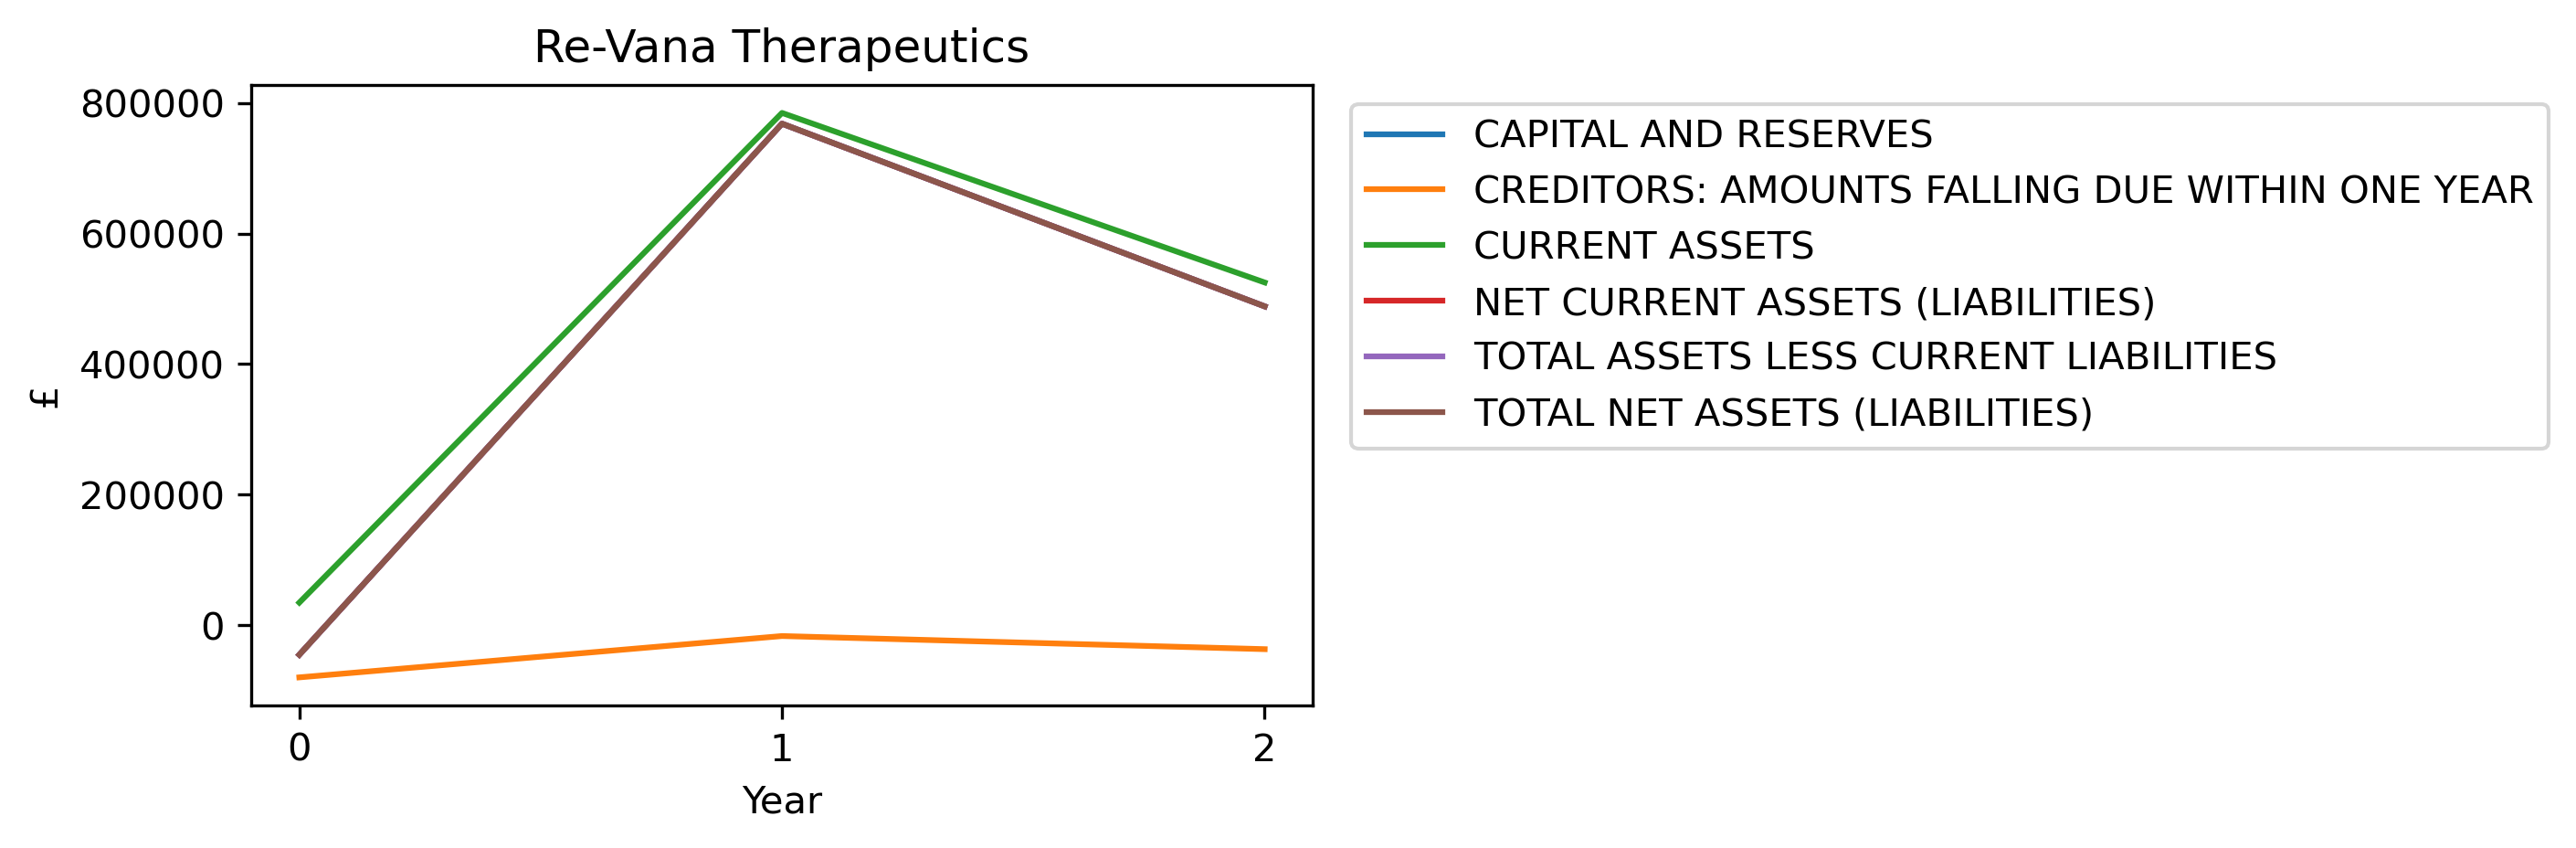

----------- ---------- -------------

Diaceutics

No information available to chart. Apols

----------- ---------- -------------

Cloudsmith

No information available to chart. Apols

----------- ---------- -------------

Kraydel

 $£$ YEP THIS IS THE GRAPH £$£



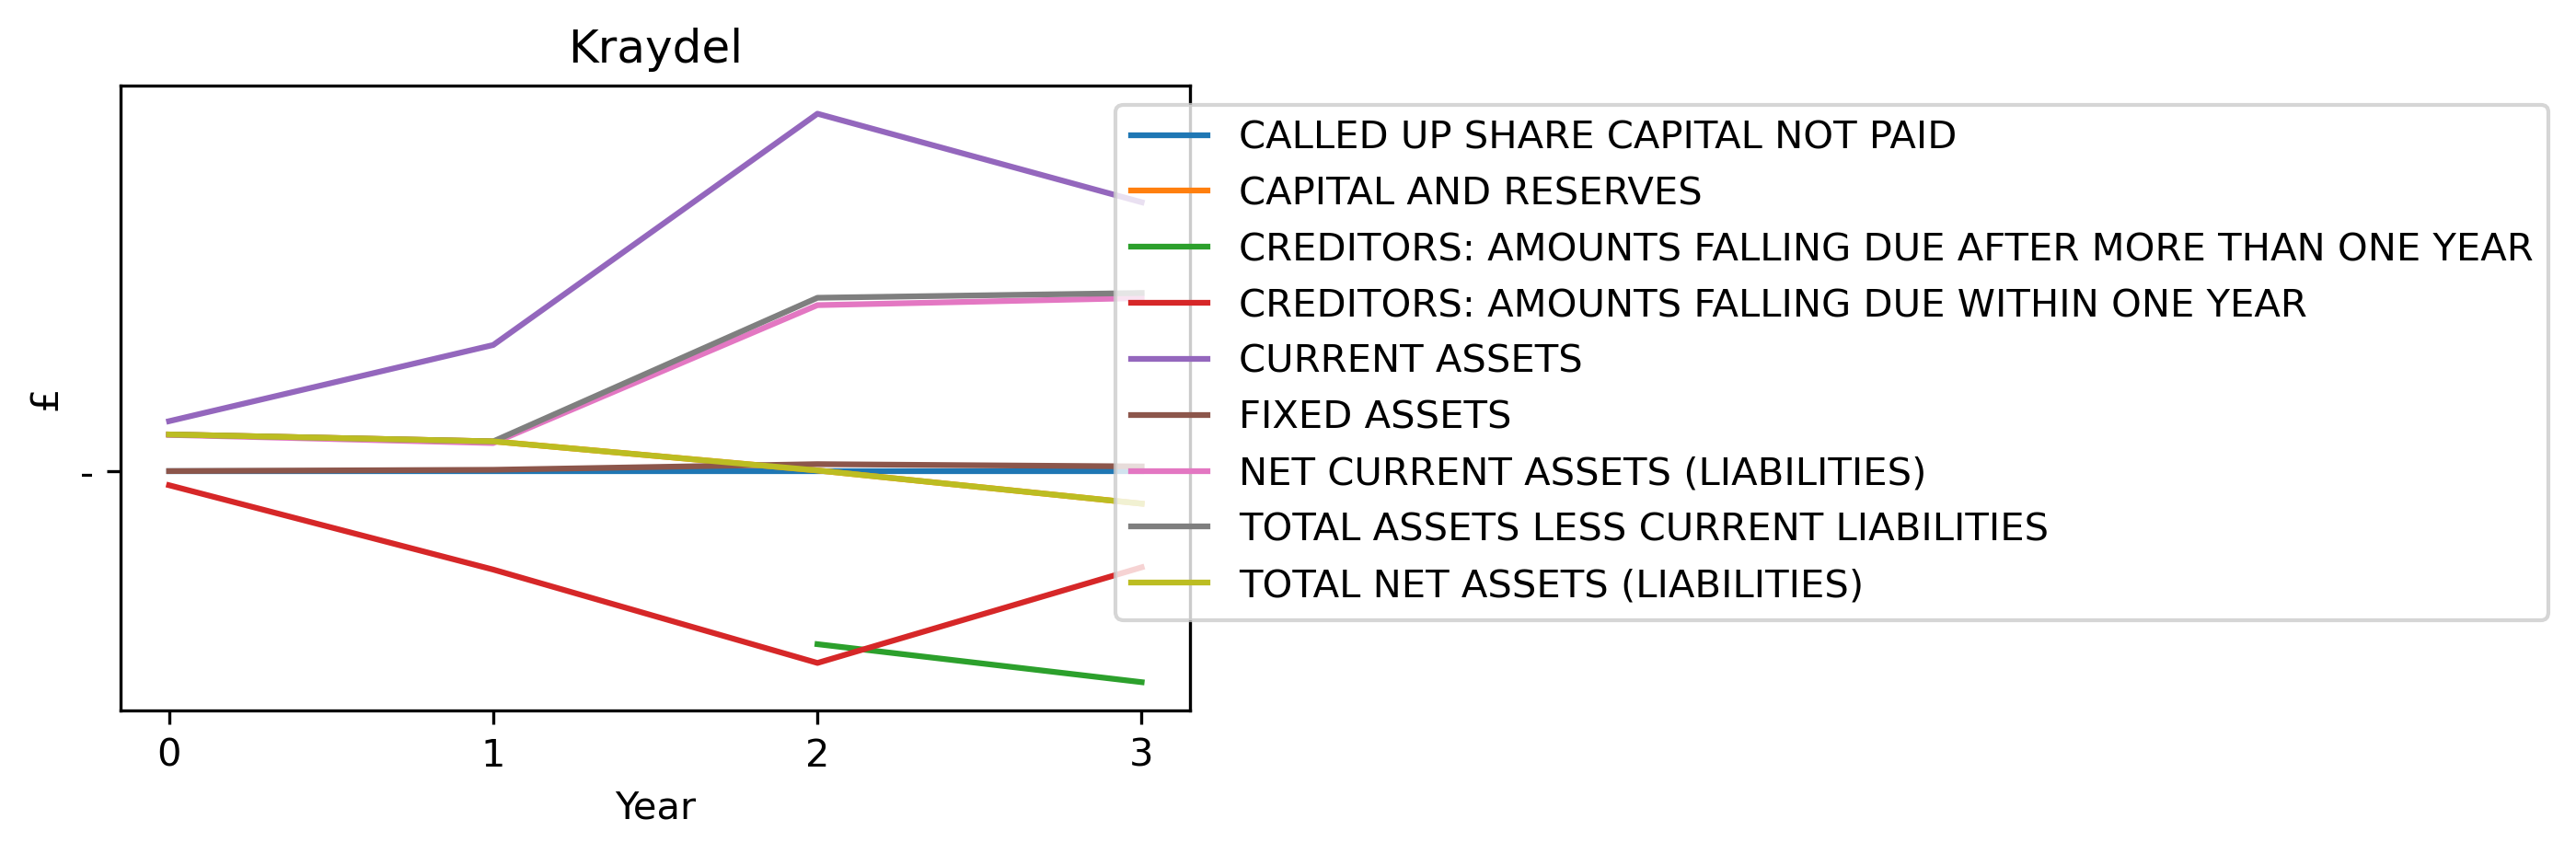

----------- ---------- -------------

Devenish Nutrition

No information available to chart. Apols

----------- ---------- -------------

Automated Intelligence

No information available to chart. Apols

----------- ---------- -------------

info@datactics.com

 $£$ YEP THIS IS THE GRAPH £$£



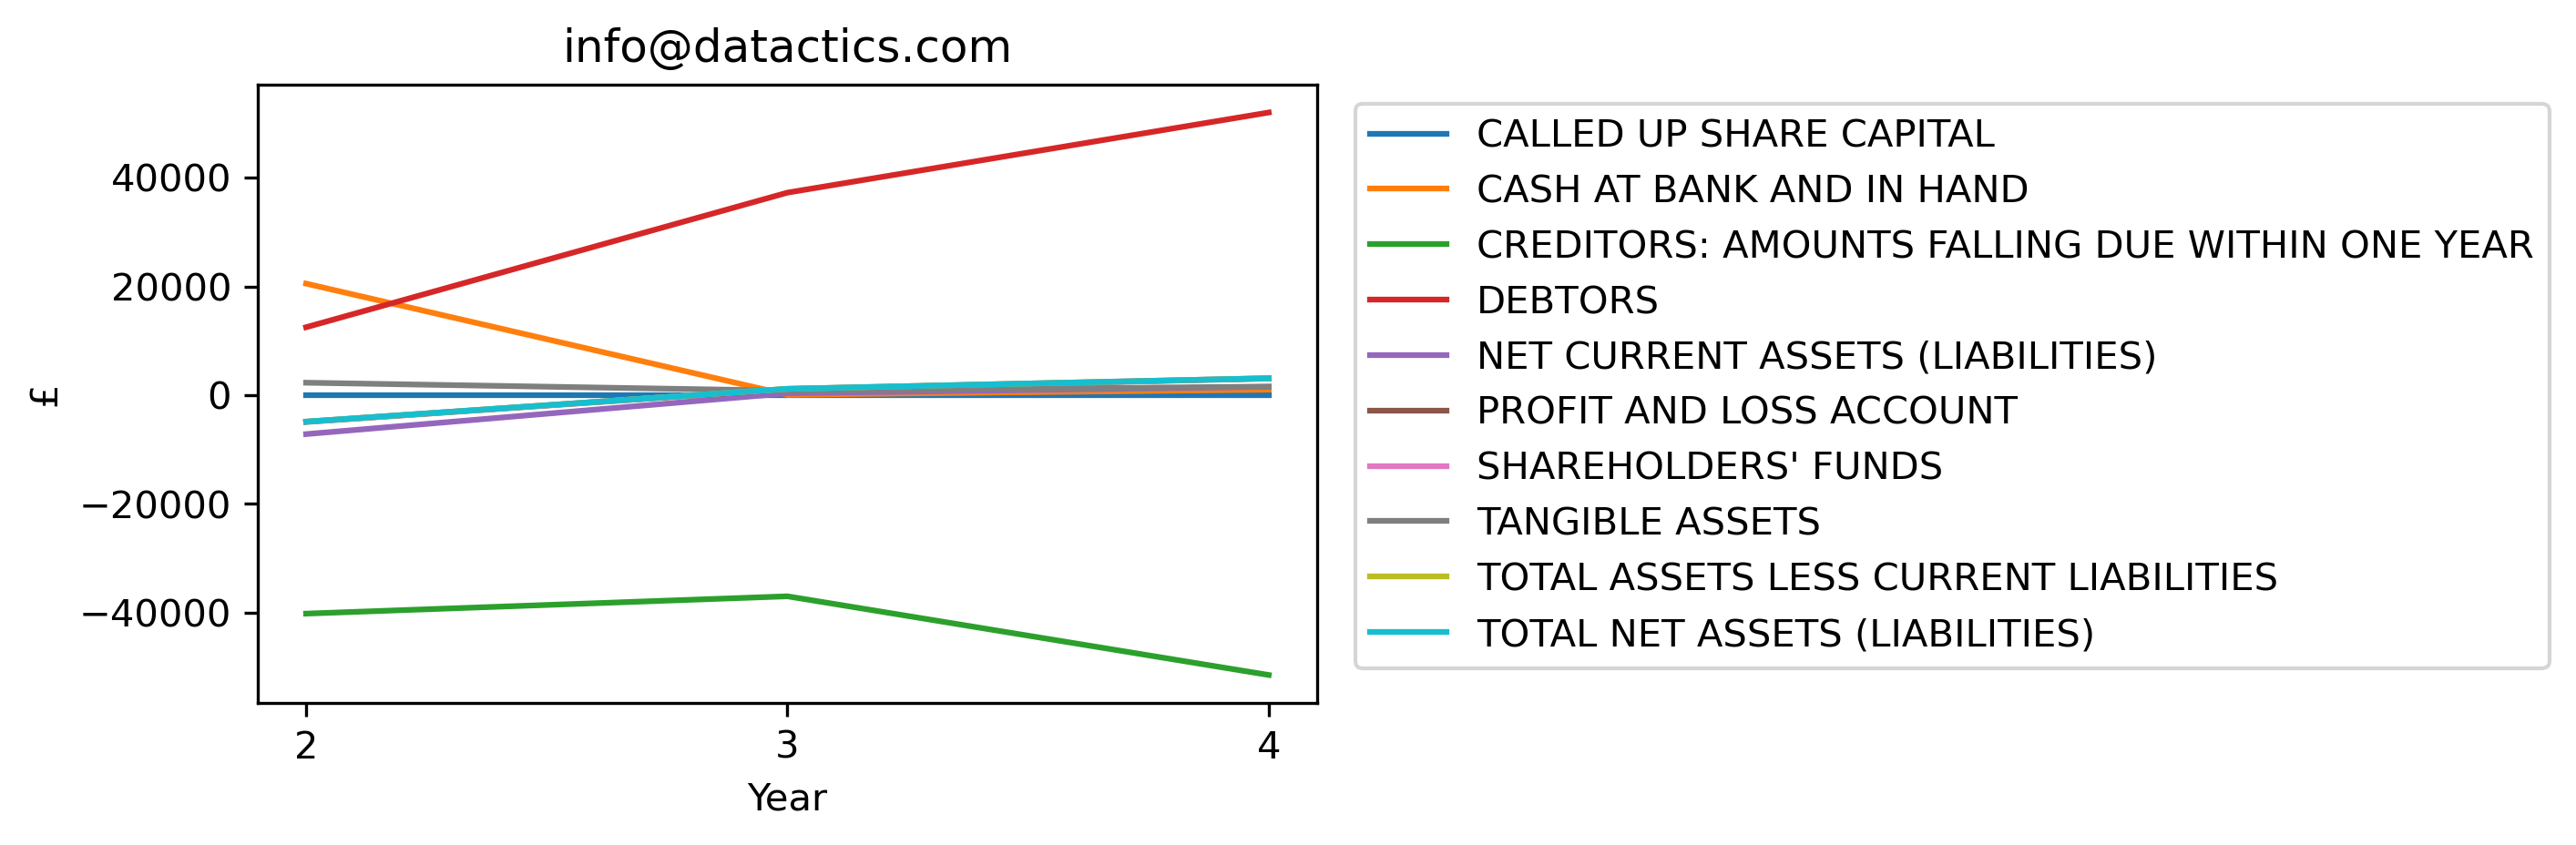

----------- ---------- -------------

Skurio

No information available to chart. Apols

----------- ---------- -------------

Neurovalens

 $£$ YEP THIS IS THE GRAPH £$£



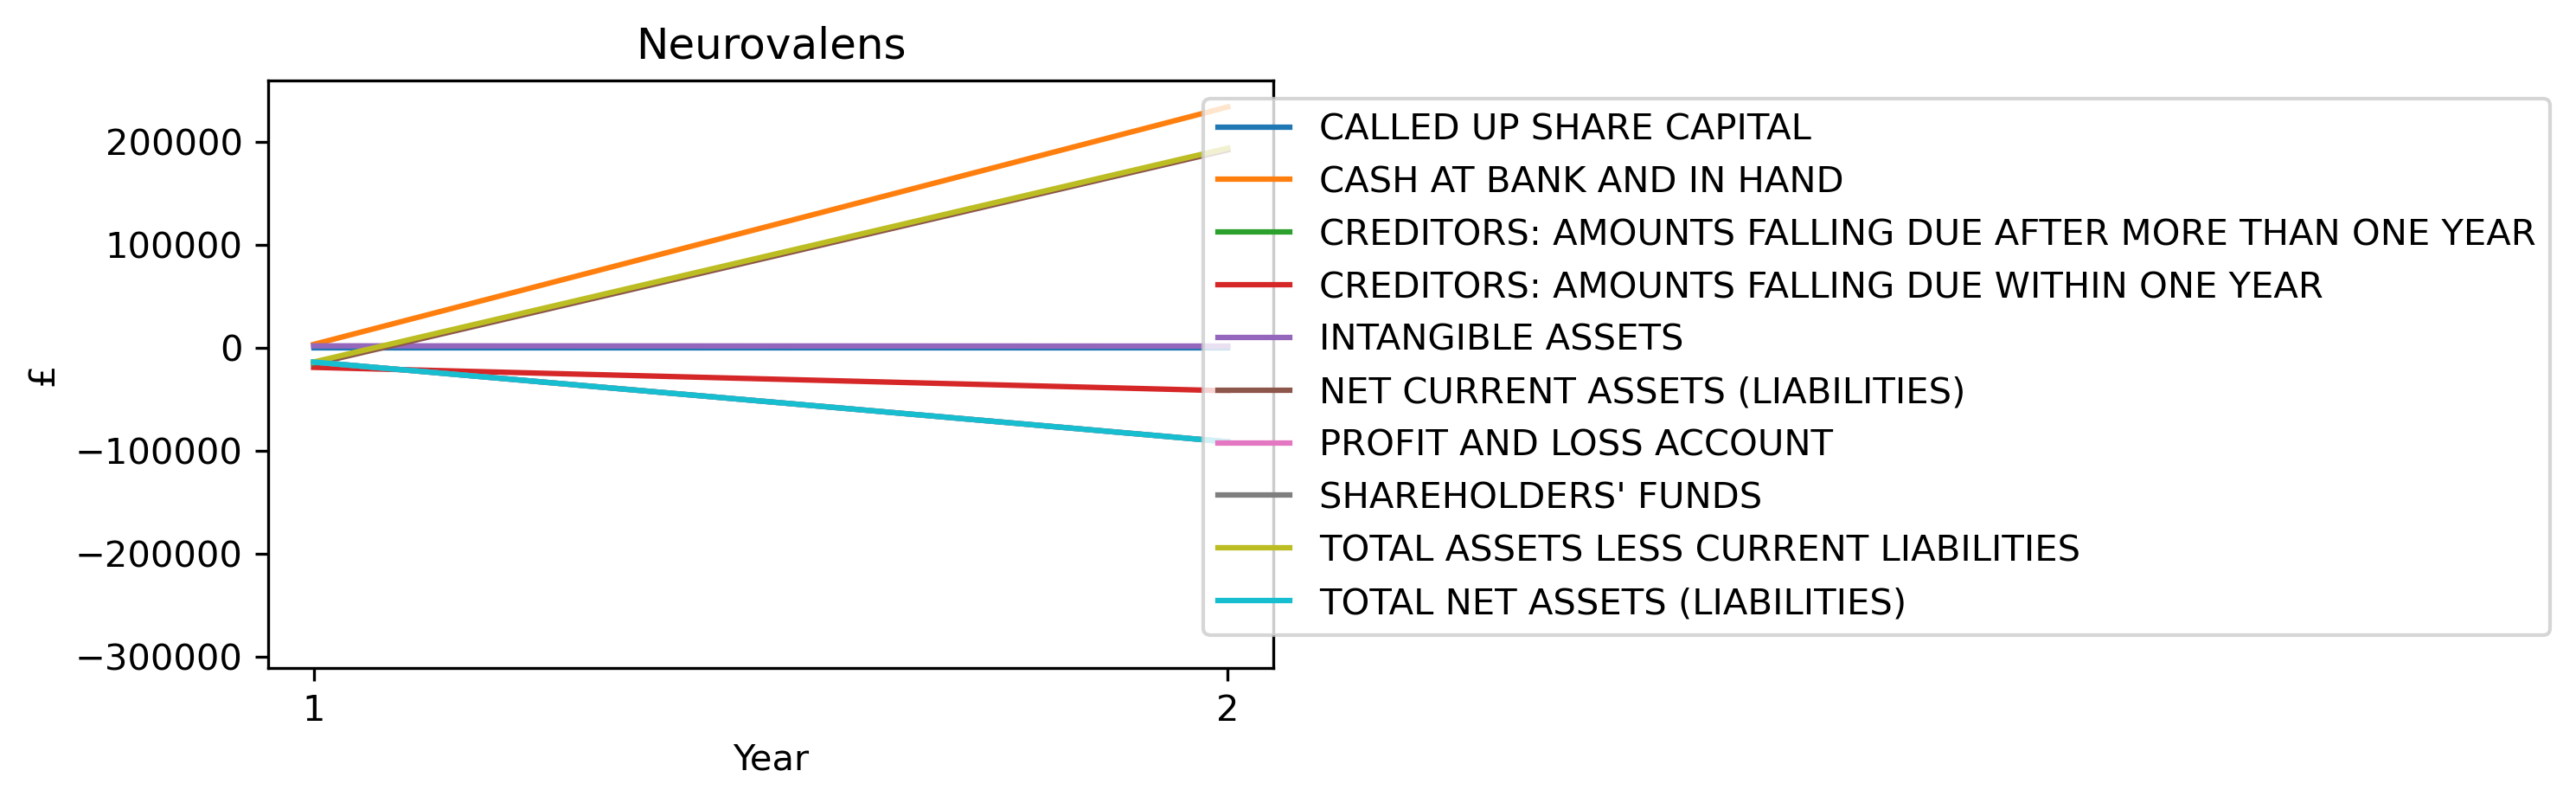

In [34]:
companies = all_accounts.columns
for company_name in companies[0:10]:    
    print("----------- ---------- -------------\n")      
    print(company_name)    
    this_comp_accs = (all_accounts[company_name].dropna(how='all'))
    this_comp_accs_df = create_ind_acc_df(this_comp_accs,company_name)
    this_comp_annuals_df = this_comp_accs_df.pivot(index='title',columns='year', values='acc_values')
    if this_comp_annuals_df.empty:
        print("\nNo information available to chart. Apols\n")
    else:
        bal_sheet_plot(this_comp_annuals_df,company_name)
        
    